## Mounting Google Drive to get the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Importing Dataset

In [ ]:
# Update this path with your actual file path in Google Drive
data_path = "/content/drive/MyDrive/Ostad - Dataset/DDS - Dataset.csv"
df = pd.read_csv(data_path)

# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset Shape: (768, 9)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dataset Description:
        Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


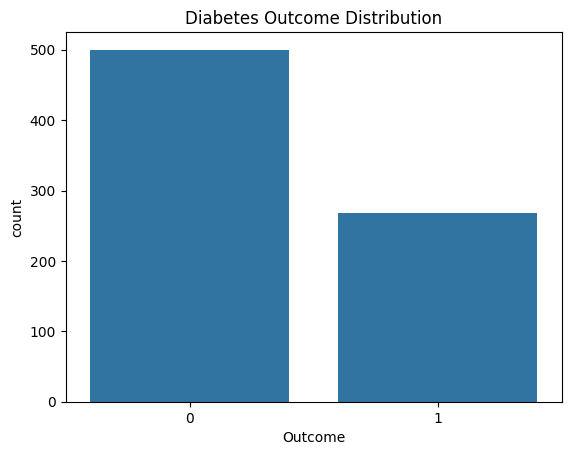

In [ ]:
#Dataset Analysis

print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Description:\n", df.describe())

# Visualize class distribution

sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

## Feature Scaling & Data Preparation

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Applying StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Training

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

# Model Evaluation

## Confusion Matrix

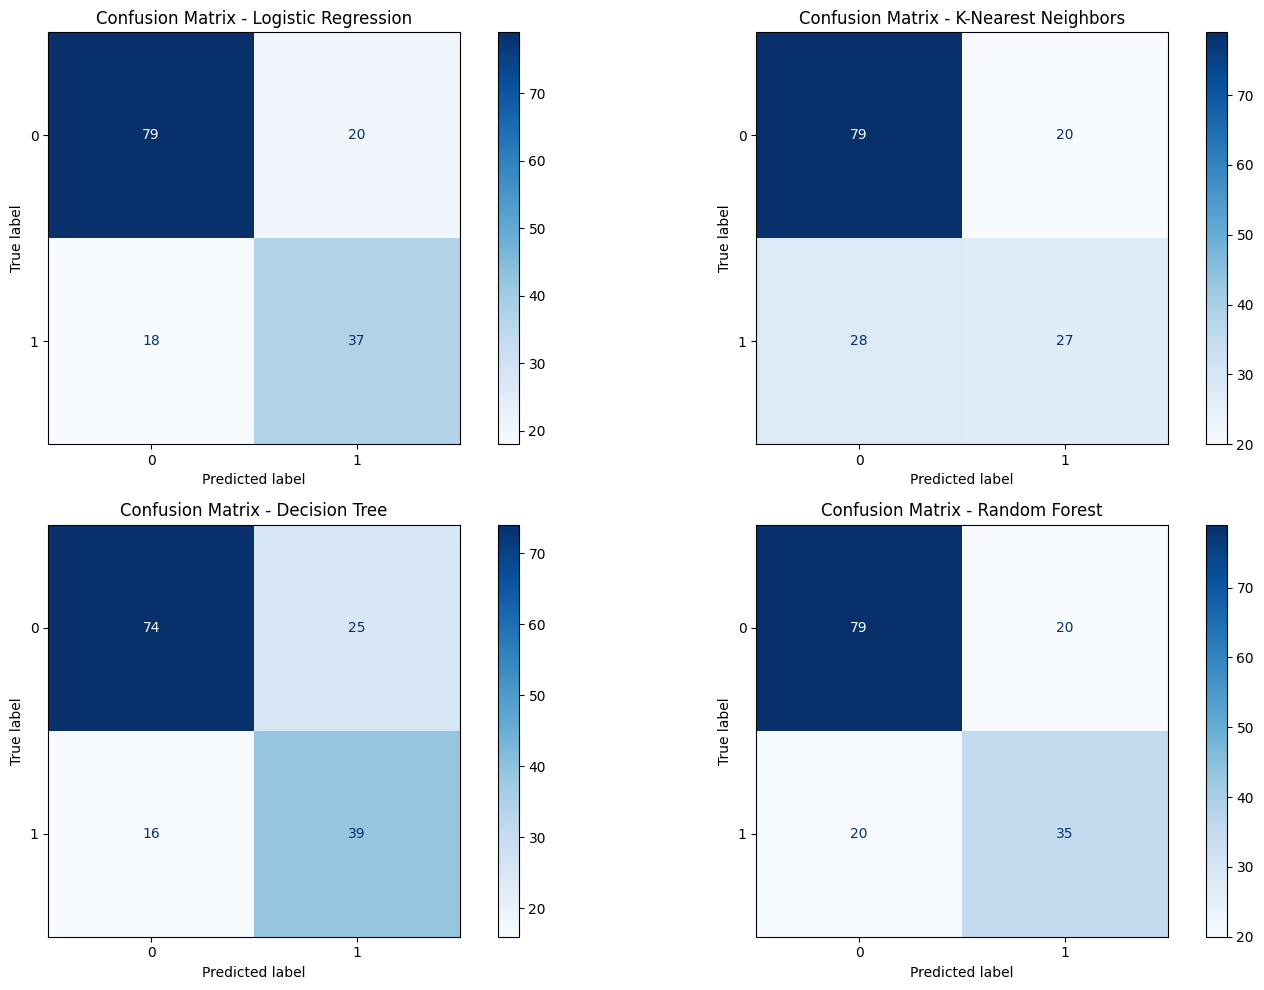

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 2, i+1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
    plt.title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.show()

## Classification Reports

In [ ]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    print(f" Classification Report for {name}")
    print(classification_report(y_test, y_pred))
    print("="*60)

 Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

 Classification Report for K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154

 Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73    

## ROC Curves & AUC Scores

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


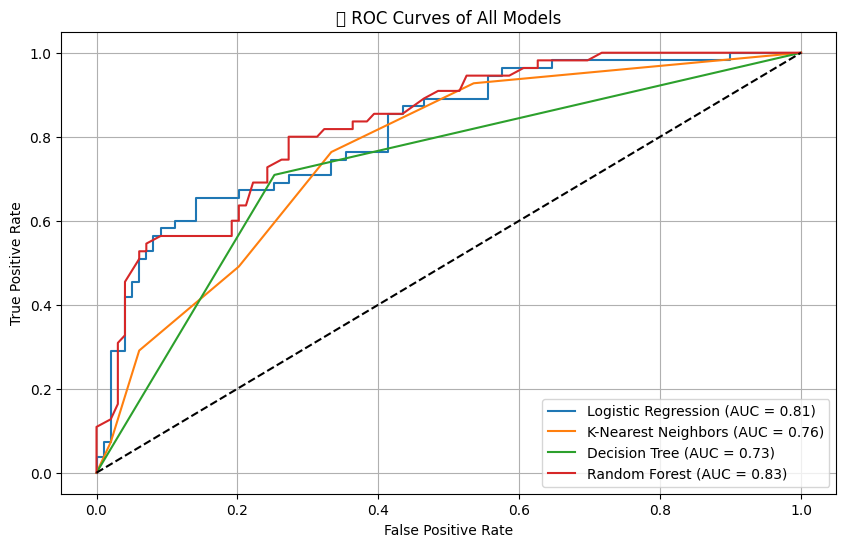


 AUC Scores Summary:
Logistic Regression: 0.8147
K-Nearest Neighbors: 0.7643
Decision Tree: 0.7283
Random Forest: 0.8292


In [ ]:
plt.figure(figsize=(10, 6))
plt.title("📈 ROC Curves of All Models")
auc_scores = {}

for name, model in trained_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    auc_scores[name] = auc

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Print AUC summary
print("\n AUC Scores Summary:")
for name, score in auc_scores.items():
    print(f"{name}: {score:.4f}")

In [ ]:
sorted_auc = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)

print("Models Ranked by AUC Score:\n")
for rank, (name, score) in enumerate(sorted_auc, start=1):
    print(f"{rank}. {name} — AUC Score: {score:.4f}")

Models Ranked by AUC Score:

1. Random Forest — AUC Score: 0.8292
2. Logistic Regression — AUC Score: 0.8147
3. K-Nearest Neighbors — AUC Score: 0.7643
4. Decision Tree — AUC Score: 0.7283


## Model Prediction

In [ ]:
# Example input: [Pregnancies, Glucose, BloodPressure, Skin Thickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
new_data = np.array([[2, 120, 70, 25, 85, 28.5, 0.45, 32]])  # Replace with your own values
new_data_scaled = scaler.transform(new_data)

# Picking Random Forest model to use for prediction
selected_model = trained_models["Random Forest"]  # You can change this to any model
prediction = selected_model.predict(new_data_scaled)[0]
probability = selected_model.predict_proba(new_data_scaled)[0][1]

print("Prediction:", "Diabetic" if prediction == 1 else "Non-Diabetic")
print("Probability of being diabetic:", f"{probability:.2f}")

Prediction: Non-Diabetic
Probability of being diabetic: 0.26


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
